<a href="https://colab.research.google.com/github/hhiraba/exercises/blob/master/notebooks/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install matplotlib numpy scikit-image Pillow torch torchvision

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from PIL import Image

In [0]:
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, (3, 3))
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(32, 64, (3, 3))
    self.relu2 = nn.ReLU()
    self.pooling = nn.AdaptiveMaxPool2d((3, 3))
    self.fc = nn.Conv2d(64, 10, (3, 3))

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pooling(x)
    return self.fc(x)
  

In [0]:
mod = MyModule()

In [0]:
d_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
d_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Image.fromarray(np.asarray(d_train.iloc[0, 1:]).reshape(28, 28).astype(np.uint8))

In [0]:
def row2img(row):
  return Image.fromarray(np.asarray(row)
    .reshape(28, 28)
    .astype(np.uint8))
  
row2img(d_train.iloc[1, 1:])

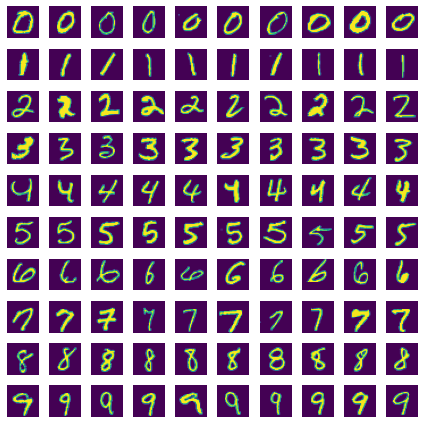

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(6, 6), sharex=True, sharey=True)
for row in range(10):
  data = d_train[d_train[0] == row]
  for col in range(10):
    im = row2img(data.iloc[col, 1:])
    ax = axes[row, col]
    ax.imshow(im)
    ax.set_axis_off()
fig.set_tight_layout(True)